In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import helper as hp
from statsmodels.regression import linear_model
import scipy.stats as stats

plt.style.use('ggplot')

In [26]:
pathways = {'Denver': ('~/Desktop/capstone/data/Denver_1940_2010.csv', ''),
            'Seattle': ('~/Desktop/capstone/data/Seattle_1898_.csv', 'SEATTLE TACOMA AIRPORT, WA US'),
            'Cedar': ('~/Desktop/capstone/data/Seattle_1898_.csv', 'CEDAR LAKE, WA US'),
            'Boston': ('~/Desktop/capstone/data/Boston_1936_corr.csv', ''),
            'JP': ('~/Desktop/capstone/data/JP.csv', '')}

In [27]:
####  Load all
start_date = datetime(1950,1,1)
end_date = datetime(2019,12,31)
Location = dict()
for name, path in pathways.items():
    Location[name] = hp.GHCN_Loc(*path)
    Location[name].set_range(start_date, end_date)
    Location[name].process()
    Location[name].create_aggregate_df()

# data_path ='~/Desktop/capstone/data/Denver_1940_2010.csv'
# Den = hp.GHCN_Loc(data_path)
# Den.set_range(start_date, end_date)
# Den.process()
# Den.create_aggregate_df()
# # Den.agg_df.head(2)
# Den.raw_df.head(2)

In [4]:
start_date in Location['Boston'].dates#  > datetime(1970,1,1)

True

In [5]:
CI_dict = dict()


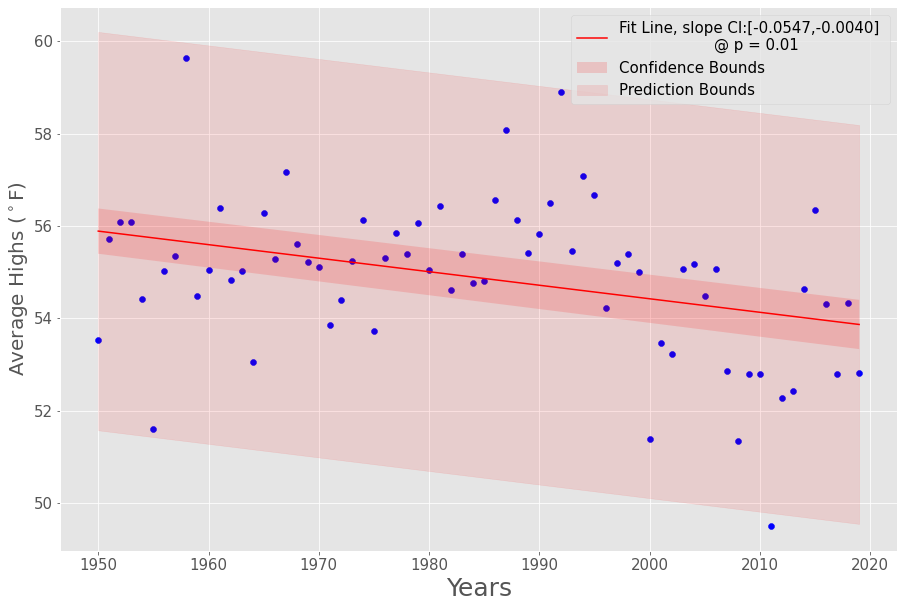

In [30]:
fig, ax = plt.subplots(1, figsize=(15,10))
Loc = Location['Denver']
# measure = 'TMAX_avg'
# Loc = Sea_Tac
Loc.stats(ax, 'SNOW_sum', 0.05)
# Loc.stats(ax, 'PRCP_sum')
# Loc.stats(ax, 'TMAX_avg', 0.01)
# Loc.stats(ax, 'TMIN_avg')
# Loc.stats(ax, 'SNWD_cnt')
ax.legend(fontsize=15)
# CI_dict['Denver'] =

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

In [3]:
####  BOSTON
# start_date = datetime(1939,1,1)
# end_date = datetime(1939,12,31)
data_path ='~/Desktop/capstone/data/Boston_1936_corr.csv'
Bos = hp.GHCN_Loc(data_path)
Bos.set_range(start_date, end_date)
Bos.process()
Bos.create_aggregate_df()
Bos.agg_df.head(2)

,Year,PRCP_sum,TMAX_avg,TMIN_avg,SNOW_sum,SNWD_cnt
0,1950,32.70,59.630137,43.104110,30.9,33
1,1951,46.97,60.221918,44.339726,35.4,24


In [4]:
####  SEATTLE - SEATAC
data_path ='~/Desktop/capstone/data/Seattle_1898_.csv'
source = 'SEATTLE TACOMA AIRPORT, WA US'
# source = 'CEDAR LAKE, WA US'
Sea_Tac = hp.GHCN_Loc(data_path, source)
Sea_Tac.set_range(start_date, end_date)
Sea_Tac.process()
Sea_Tac.create_aggregate_df()
Sea_Tac.agg_df.head(2)

,Year,PRCP_sum,TMAX_avg,TMIN_avg,SNOW_sum,SNWD_cnt
0,1950,55.14,57.035616,41.000000,60.6,29
1,1951,40.30,58.545205,41.052055,27.7,11


In [19]:
####  SEATTLE - CEDAR LAKE
data_path ='~/Desktop/capstone/data/Seattle_1898_.csv'
# source = 'SEATTLE TACOMA AIRPORT, WA US'
source = 'CEDAR LAKE, WA US'
Sea_CL = hp.GHCN_Loc(data_path, source)
Sea_CL.set_range(start_date, end_date)
Sea_CL.process()
Sea_CL.create_aggregate_df()
Sea_CL.agg_df.head(2)

,Year,PRCP_sum,TMAX_avg,TMIN_avg,SNOW_sum,SNWD_cnt
0,1950,131.41,53.534247,35.548209,140.0,46
1,1951,98.69,55.706849,35.517808,132.9,21


In [22]:
Lowell.TMAX.data_yr

,Month_id,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
361,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Y = Den.agg_df['TMAX_avg'].values
X = np.ones((len(Y), 2))
X[:,0] = Den.agg_df['Year'].values

In [12]:
model = linear_model.OLS(Y,X)
results = model.fit()
params = results.params
CI = results.conf_int(alpha=0.05, cols=None)[0]

In [13]:
# results.summary()
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [16]:
a,b = params
Y_mod = X[:,0]*a + b
n = len(Y)
t_stat = stats.t.ppf(0.975, n - 2)
sigma = np.sqrt(((Y_mod - Y)**2).sum()/(len(Y)-2))

den = sum((X[:,0]-X[:,0].mean())**2)


print(sigma)
print(sigma**2)

1.516645690334036
2.3002141500088045


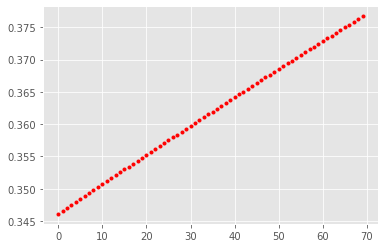

In [20]:
# stats.t.ppf(1-0.05/2, (len(Y)-2))
# n=len(Y)
# stats.t.ppf(0.975, n - 2)
interval = (X[:,0]-X[:,0].mean())/den
interval = t_stat*sigma*np.sqrt((1/n) + interval)

ax = plt.gca()
ax.plot(interval, 'r.')

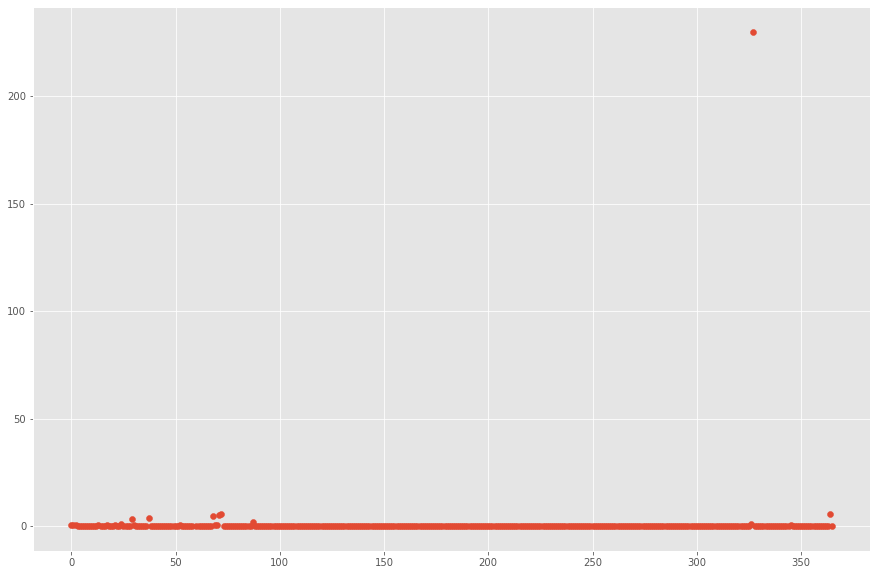

In [56]:
fig, ax = plt.subplots(1, figsize=(15,10))

Y = Bos.SNOW.data_yr[1939].values
X = list(range(len(Y)))
         
ax.scatter(X,Y)

In [57]:
Bos.SNOW.data_yr[Bos.SNOW.data_yr[1939]>200]

,Month_id,1936,1937,1938,1939,1940,1941,1942,1943,1944,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
327,11,0.0,0.0,0.0,230.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [49]:
Bos.raw_df[Bos.raw_df['SNOW'] == 230.0].values
# datetime(1939,11,1) - datetime(1939,11,1)

array([['USW00014739', 'BOSTON, MA US', 42.3606, -71.0097, 3.7,
        '1939-11-23', nan, nan, nan, nan, nan, nan, 0.0, nan, 230.0, 0.0,
        nan, 42, 32, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=object)

In [18]:
data_path ='~/Desktop/capstone/data/Seattle_1898_.csv'
# source = 'SEATTLE TACOMA AIRPORT, WA US'
source = 'CEDAR LAKE, WA US'
A = pd.read_csv(data_path, low_memory=False)
B = A[A['NAME']==source].reset_index()

In [19]:

B

,index,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACSH,AWND,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03,WV20
0,26597,USC00451233,"CEDAR LAKE, WA US",47.4144,-121.7561,475.5,1898-07-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26598,USC00451233,"CEDAR LAKE, WA US",47.4144,-121.7561,475.5,1898-07-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26599,USC00451233,"CEDAR LAKE, WA US",47.4144,-121.7561,475.5,1898-07-03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26600,USC00451233,"CEDAR LAKE, WA US",47.4144,-121.7561,475.5,1898-07-04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26601,USC00451233,"CEDAR LAKE, WA US",47.4144,-121.7561,475.5,1898-07-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42361,68958,USC00451233,"CEDAR LAKE, WA US",47.4144,-121.7561,475.5,2020-10-21,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42362,68959,USC00451233,"CEDAR LAKE, WA US",47.4144,-121.7561,475.5,2020-10-22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42363,68960,USC00451233,"CEDAR LAKE, WA US",47.4144,-121.7561,475.5,2020-10-23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42364,68961,USC00451233,"CEDAR LAKE, WA US",47.4144,-121.7561,475.5,2020-10-24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
Loc = Sea_Tac
# Loc.SNOW.data_yr.iloc[:,1:].isna().sum().values
# Loc.PRCP.data_yr.iloc[:,1:].isna().sum().values
# Loc.TMAX.data_yr.iloc[:,1:].isna().sum().values
# Loc.TMIN.data_yr.iloc[:,1:].isna().sum().values
Loc.SNWD.data_yr.iloc[:,1:].isna().sum().values

array([  1,   1,   0,   1,   1,   1,   0,   1,   1,   1,   0,   1,   1,
         1,   0,   1,   1,   1,   0,   1,   1,   1,   0,   1,   1,   1,
         0,   1,   1,   1,   0,   1,   1,   1,   0,   1,   1,   1,   0,
         1,   1,   1,   0,   1,   1,   1,  60, 366, 366, 366, 366, 365,
       366, 366, 366, 365, 366, 366, 335,   1,   1,   1,   0,   1,   1,
         1,   0,   1,   1,   1])

In [51]:
# ax = plt.gca()

In [8]:
Y.var()

NameError: name 'Y' is not defined

In [10]:
s = pd.Series(["elk", "pig", "dog", "quetzal"], name="animal")
print(s.to_markdown())
# print(s.to_markdown(tablefmt="grid"))

|    | animal   |
|---:|:---------|
|  0 | elk      |
|  1 | pig      |
|  2 | dog      |
|  3 | quetzal  |
